## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  99.835838   310.101675  0.620926  1.659222  216.972674
1  33.017091   718.028652  0.155676  5.177251  116.532334
2  28.438381  1700.034617  0.201694  3.433275  343.804215
3  83.778779  1157.208597  0.754292  1.322906  876.830230
4  28.738180   637.219391  0.054830  4.505712   45.266108


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0396522	total: 57.9ms	remaining: 57.9s
1:	learn: 1.0290610	total: 58.6ms	remaining: 29.2s
2:	learn: 1.0179241	total: 59ms	remaining: 19.6s
3:	learn: 1.0052736	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9903579	total: 59.9ms	remaining: 11.9s
5:	learn: 0.9792002	total: 60.4ms	remaining: 10s
6:	learn: 0.9650602	total: 61ms	remaining: 8.65s
7:	learn: 0.9499581	total: 61.5ms	remaining: 7.63s
8:	learn: 0.9375088	total: 62ms	remaining: 6.83s
9:	learn: 0.9231115	total: 62.6ms	remaining: 6.2s
10:	learn: 0.9129339	total: 63ms	remaining: 5.66s
11:	learn: 0.8976610	total: 63.4ms	remaining: 5.22s
12:	learn: 0.8851332	total: 63.9ms	remaining: 4.85s
13:	learn: 0.8728294	total: 64.5ms	remaining: 4.54s
14:	learn: 0.8614815	total: 64.9ms	remaining: 4.26s
15:	learn: 0.8498733	total: 65.5ms	remaining: 4.03s
16:	learn: 0.8397260	total: 66ms	remaining: 3.81s
17:	learn: 0.8291673	total: 66.3ms	remaining: 3.62s
18:	learn: 0.8212045	total: 66.7ms	remaining: 3.44s
19:	l

135:	learn: 0.2131174	total: 118ms	remaining: 751ms
136:	learn: 0.2110998	total: 119ms	remaining: 749ms
137:	learn: 0.2093243	total: 119ms	remaining: 746ms
138:	learn: 0.2071565	total: 120ms	remaining: 743ms
139:	learn: 0.2050064	total: 121ms	remaining: 741ms
140:	learn: 0.2033482	total: 121ms	remaining: 737ms
141:	learn: 0.2009467	total: 121ms	remaining: 733ms
142:	learn: 0.1991978	total: 122ms	remaining: 729ms
143:	learn: 0.1970447	total: 122ms	remaining: 726ms
144:	learn: 0.1954211	total: 123ms	remaining: 727ms
145:	learn: 0.1928752	total: 124ms	remaining: 724ms
146:	learn: 0.1911072	total: 124ms	remaining: 721ms
147:	learn: 0.1890624	total: 125ms	remaining: 717ms
148:	learn: 0.1868440	total: 125ms	remaining: 714ms
149:	learn: 0.1849176	total: 126ms	remaining: 711ms
150:	learn: 0.1830376	total: 126ms	remaining: 708ms
151:	learn: 0.1814800	total: 126ms	remaining: 704ms
152:	learn: 0.1800502	total: 127ms	remaining: 701ms
153:	learn: 0.1787939	total: 127ms	remaining: 697ms
154:	learn: 

288:	learn: 0.0594951	total: 186ms	remaining: 457ms
289:	learn: 0.0590986	total: 187ms	remaining: 457ms
290:	learn: 0.0587281	total: 187ms	remaining: 455ms
291:	learn: 0.0583716	total: 187ms	remaining: 454ms
292:	learn: 0.0579985	total: 188ms	remaining: 453ms
293:	learn: 0.0576749	total: 188ms	remaining: 452ms
294:	learn: 0.0573155	total: 188ms	remaining: 450ms
295:	learn: 0.0569603	total: 189ms	remaining: 449ms
296:	learn: 0.0565587	total: 189ms	remaining: 448ms
297:	learn: 0.0561630	total: 190ms	remaining: 447ms
298:	learn: 0.0558225	total: 190ms	remaining: 445ms
299:	learn: 0.0554927	total: 190ms	remaining: 444ms
300:	learn: 0.0551367	total: 191ms	remaining: 443ms
301:	learn: 0.0548192	total: 191ms	remaining: 442ms
302:	learn: 0.0545189	total: 191ms	remaining: 440ms
303:	learn: 0.0542052	total: 192ms	remaining: 439ms
304:	learn: 0.0538965	total: 192ms	remaining: 438ms
305:	learn: 0.0535219	total: 193ms	remaining: 438ms
306:	learn: 0.0531621	total: 194ms	remaining: 437ms
307:	learn: 

550:	learn: 0.0175512	total: 300ms	remaining: 245ms
551:	learn: 0.0174789	total: 301ms	remaining: 244ms
552:	learn: 0.0174323	total: 301ms	remaining: 244ms
553:	learn: 0.0173843	total: 302ms	remaining: 243ms
554:	learn: 0.0173101	total: 302ms	remaining: 242ms
555:	learn: 0.0172377	total: 303ms	remaining: 242ms
556:	learn: 0.0171700	total: 303ms	remaining: 241ms
557:	learn: 0.0171012	total: 304ms	remaining: 240ms
558:	learn: 0.0170129	total: 304ms	remaining: 240ms
559:	learn: 0.0169664	total: 304ms	remaining: 239ms
560:	learn: 0.0169109	total: 305ms	remaining: 239ms
561:	learn: 0.0168409	total: 305ms	remaining: 238ms
562:	learn: 0.0167865	total: 306ms	remaining: 237ms
563:	learn: 0.0167182	total: 306ms	remaining: 237ms
564:	learn: 0.0166511	total: 307ms	remaining: 236ms
565:	learn: 0.0165847	total: 307ms	remaining: 235ms
566:	learn: 0.0165289	total: 307ms	remaining: 235ms
567:	learn: 0.0164452	total: 308ms	remaining: 234ms
568:	learn: 0.0163911	total: 308ms	remaining: 234ms
569:	learn: 

706:	learn: 0.0107753	total: 367ms	remaining: 152ms
707:	learn: 0.0107269	total: 368ms	remaining: 152ms
708:	learn: 0.0106903	total: 368ms	remaining: 151ms
709:	learn: 0.0106703	total: 369ms	remaining: 151ms
710:	learn: 0.0106274	total: 369ms	remaining: 150ms
711:	learn: 0.0106078	total: 370ms	remaining: 149ms
712:	learn: 0.0105882	total: 370ms	remaining: 149ms
713:	learn: 0.0105384	total: 370ms	remaining: 148ms
714:	learn: 0.0105061	total: 371ms	remaining: 148ms
715:	learn: 0.0104870	total: 371ms	remaining: 147ms
716:	learn: 0.0104515	total: 371ms	remaining: 147ms
717:	learn: 0.0104327	total: 372ms	remaining: 146ms
718:	learn: 0.0103824	total: 372ms	remaining: 145ms
719:	learn: 0.0103641	total: 373ms	remaining: 145ms
720:	learn: 0.0103482	total: 373ms	remaining: 144ms
721:	learn: 0.0103136	total: 374ms	remaining: 144ms
722:	learn: 0.0102658	total: 374ms	remaining: 143ms
723:	learn: 0.0102432	total: 374ms	remaining: 143ms
724:	learn: 0.0102248	total: 375ms	remaining: 142ms
725:	learn: 

973:	learn: 0.0047891	total: 483ms	remaining: 12.9ms
974:	learn: 0.0047828	total: 483ms	remaining: 12.4ms
975:	learn: 0.0047740	total: 484ms	remaining: 11.9ms
976:	learn: 0.0047677	total: 484ms	remaining: 11.4ms
977:	learn: 0.0047511	total: 484ms	remaining: 10.9ms
978:	learn: 0.0047425	total: 485ms	remaining: 10.4ms
979:	learn: 0.0047267	total: 485ms	remaining: 9.9ms
980:	learn: 0.0047205	total: 486ms	remaining: 9.41ms
981:	learn: 0.0047085	total: 486ms	remaining: 8.91ms
982:	learn: 0.0046930	total: 486ms	remaining: 8.41ms
983:	learn: 0.0046765	total: 487ms	remaining: 7.91ms
984:	learn: 0.0046604	total: 487ms	remaining: 7.42ms
985:	learn: 0.0046545	total: 488ms	remaining: 6.92ms
986:	learn: 0.0046485	total: 488ms	remaining: 6.43ms
987:	learn: 0.0046426	total: 489ms	remaining: 5.93ms
988:	learn: 0.0046344	total: 489ms	remaining: 5.44ms
989:	learn: 0.0046189	total: 489ms	remaining: 4.94ms
990:	learn: 0.0046032	total: 490ms	remaining: 4.45ms
991:	learn: 0.0045958	total: 490ms	remaining: 3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


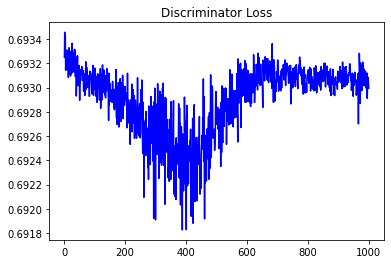

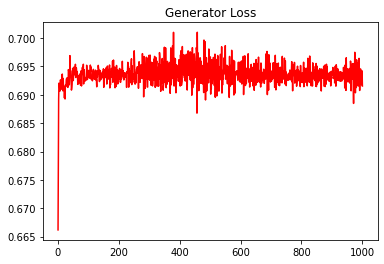

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.02492374050917957


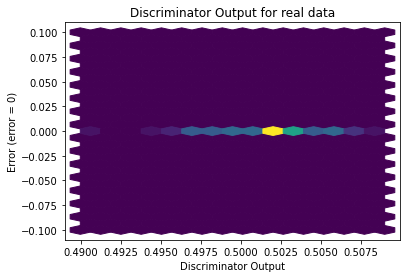

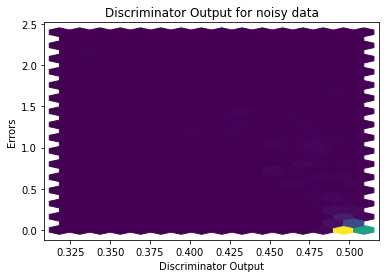

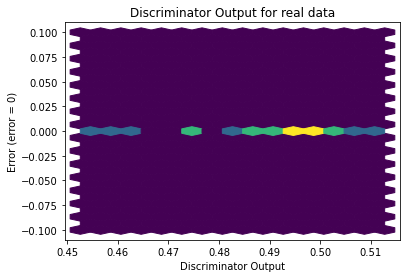

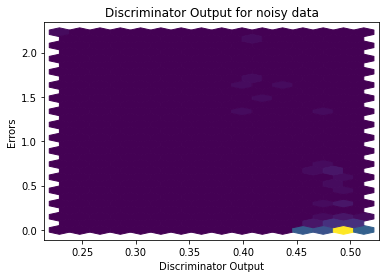

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0942]], requires_grad=True)
